In [91]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import free_fermion_representation as f
import PhaseDiagram as PD
import PhaseDiagramFast as PDFast

import importlib
importlib.reload(site)
importlib.reload(honey)
importlib.reload(f)
importlib.reload(PD)
importlib.reload(PDFast)


<module 'PhaseDiagramFast' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/PhaseDiagramFast.py'>

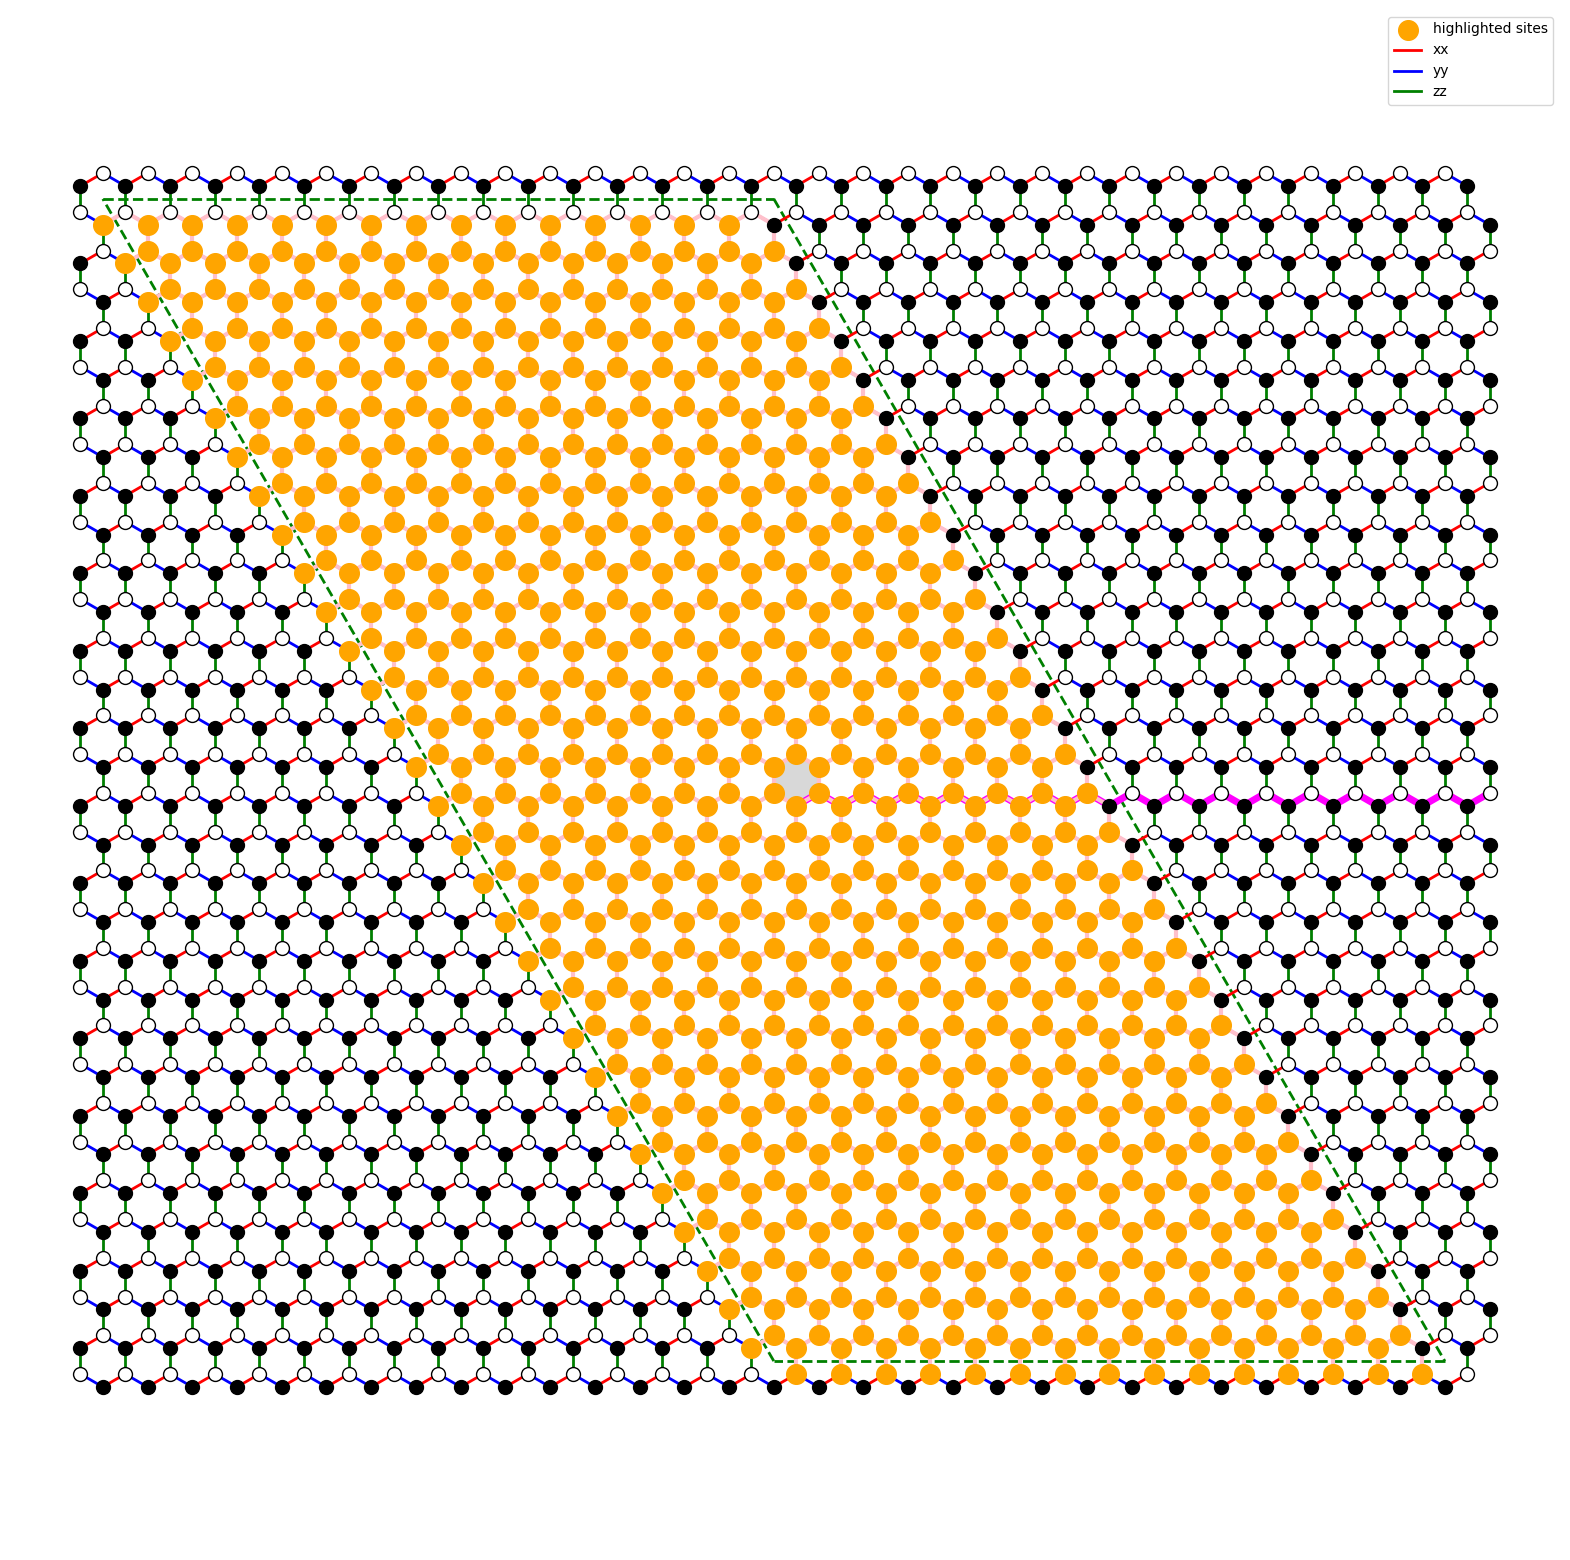

In [70]:
model = site.SitesOBC(Npx = 31, Npy = 31, edge = True)

prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, dotsize = 200,
                    loop = True,
                    plot_diagonal_bonds=False,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list
                    )

In [71]:
print(model.Nsites)

2046


In [72]:
fgs = f.FermionicGaussianRepresentation(model)


In [73]:
delta = 0
T = 0.7
N_cycles = 20

In [74]:
orderpar = PD.order_parameter_delta_T(model, fgs, delta, T, N_cycles)

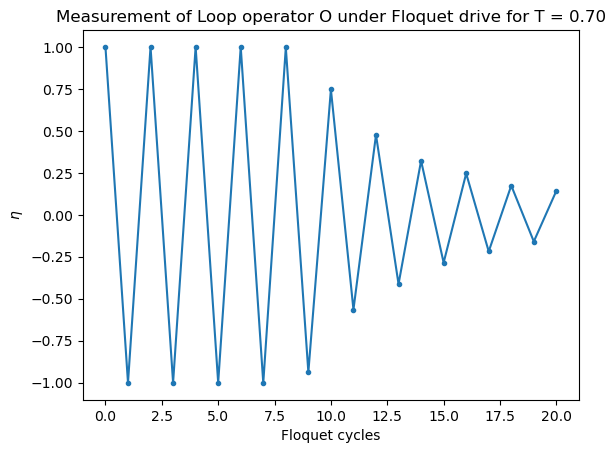

In [75]:
plt.plot(range(N_cycles+1), orderpar, '.-')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title(f"Measurement of Loop operator O under Floquet drive for T = {T:.2f}")
plt.show()

## 2D Phase Diagram

We run the big function!

In [84]:
delta_list = [0, 0.1]
T_list = np.linspace(1,0.6,10)
N_cycles = 10

In [85]:
freqs, N_list, data_grid = PD.order_parameter(model, T_list, delta_list, N_cycles)

delta:  0 ;   T:  1.0
delta:  0 ;   T:  0.9555555555555556
delta:  0 ;   T:  0.9111111111111111
delta:  0 ;   T:  0.8666666666666667
delta:  0 ;   T:  0.8222222222222222
delta:  0 ;   T:  0.7777777777777778
delta:  0 ;   T:  0.7333333333333334
delta:  0 ;   T:  0.6888888888888889
delta:  0 ;   T:  0.6444444444444444
delta:  0 ;   T:  0.6
delta:  0.1 ;   T:  1.0
delta:  0.1 ;   T:  0.9555555555555556
delta:  0.1 ;   T:  0.9111111111111111
delta:  0.1 ;   T:  0.8666666666666667
delta:  0.1 ;   T:  0.8222222222222222
delta:  0.1 ;   T:  0.7777777777777778
delta:  0.1 ;   T:  0.7333333333333334
delta:  0.1 ;   T:  0.6888888888888889
delta:  0.1 ;   T:  0.6444444444444444
delta:  0.1 ;   T:  0.6


Save the data if wanted (doit = True)

In [86]:
PD.save_file(data_grid, 'data_grid_slow', doit = True)

AttributeError: module 'PhaseDiagram' has no attribute 'save_file'

Load it if wanted (doit = True)

In [ ]:
data_gridd = PD.load_file(data_grid, data_grid, doit = False)

Do the colorplot!

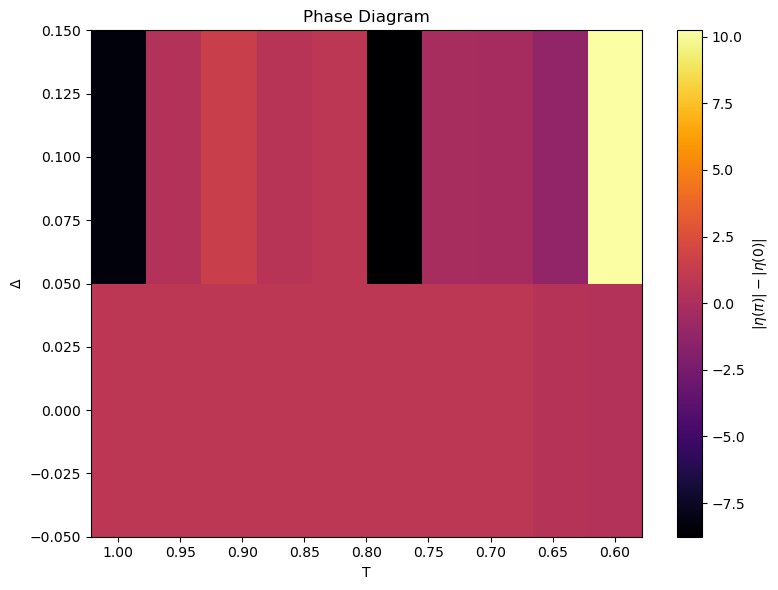

In [92]:
PD.plot_order_parameter_results(data_grid, T_list, delta_list)

Plot order parameter and respective Fourier transform for certain values

In [ ]:
# Choose the specific values you're interested in
delta_target = 0.1
T_target = 0.3

# Get indices from mapping
i = delta_list.index(delta_target)
j = T_list.index(T_target)

# Access the dictionary stored at that position
entry = data_grid[i, j]

# Extract what you want
op_real = entry['op_real']
op_ft = entry['op_ft']




In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(time, op_real, label=f"delta={delta_target}, T={T_target}")
plt.xlabel("Cycle")
plt.ylabel("Order parameter (real)")
plt.title("Real-time order parameter evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

plt.figure(figsize=(6, 4))
plt.plot(time, op_real, label=f"delta={delta_target}, T={T_target}")
plt.xlabel("Cycle")
plt.ylabel("Order parameter (real)")
plt.title("Real-time order parameter evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()